In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.datasets import boston_housing

In [2]:
(full_train_data, full_train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [9]:
print(full_train_data.shape)
print(test_data.shape)
table = pd.DataFrame(np.hstack((full_train_data, full_train_labels.reshape(-1, 1))))
display(table)
display(table.describe())
display(table.info())

(404, 13)
(102, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817,22.395050
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545,9.210442
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000,16.675000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000,20.750000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
 13  13      404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


None

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


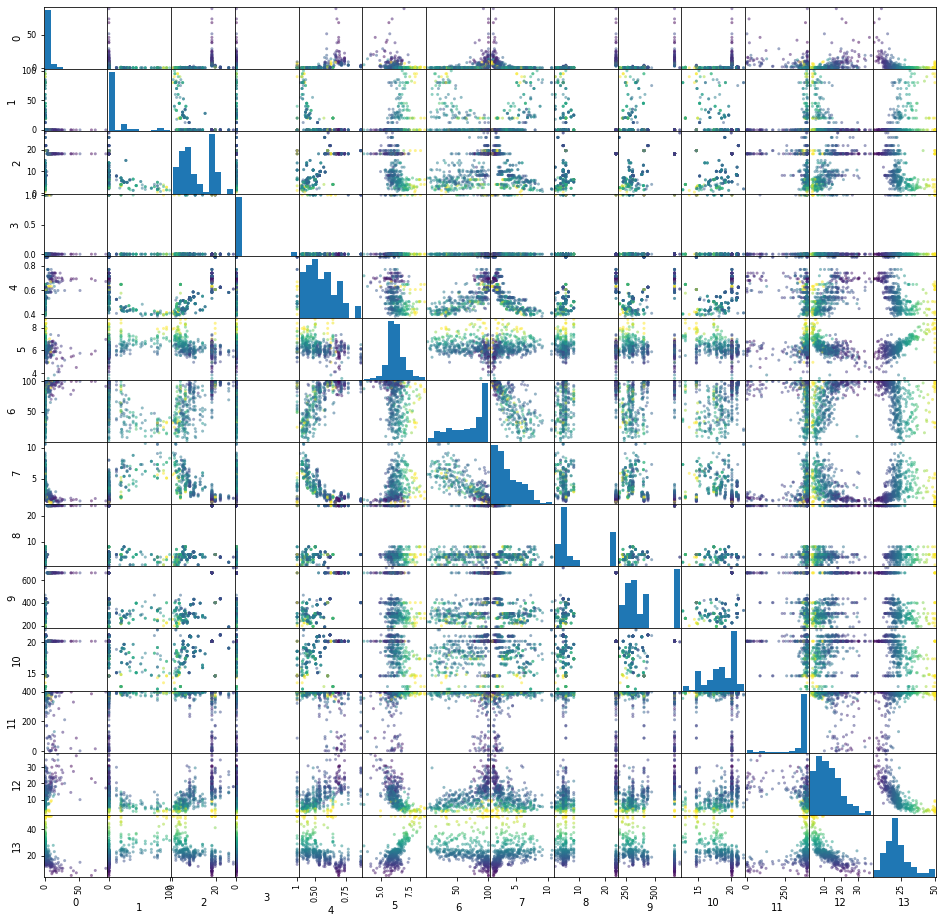

In [21]:
fig, ax = plt.subplots(1,1, figsize = (16, 16))
pd.plotting.scatter_matrix(table, ax = ax, alpha = 0.5, c = table[13])
plt.show()

In [71]:
# sca_X = StandardScaler().fit(full_train_data)
# sca_y = StandardScaler().fit(full_train_labels.reshape(-1, 1))

# X_train, X_valid, y_train, y_valid = train_test_split(sca_X.transform(full_train_data), 
#                                         sca_y.transform(full_train_labels.reshape(-1, 1)).reshape(1, -1)[0], 
#                                         test_size = 0.2, random_state = 0)
# X_test, y_test = sca_X.transform(test_data), sca_y.transform(test_labels.reshape(-1, 1)).reshape(1, -1)

# print(X_train.mean(), y_train.mean(), X_valid.mean(), y_valid.mean(), X_test.mean(), y_test.mean())
# print(X_train.std(), y_train.std(), X_valid.std(), y_valid.std(), X_test.std(), y_test.std())

-0.006782033148858529 0.026654769960478532 0.027044403791140176 -0.10629000860783261 0.020826991430640224 0.07428842657381103
0.9967099960855245 1.0082829204339592 1.0125615131733854 0.9589248517675246 0.9836083446422431 0.9918221063708136


In [73]:
sca_X = StandardScaler().fit(full_train_data)

X_train, X_valid, y_train, y_valid = train_test_split(sca_X.transform(full_train_data), full_train_labels, 
                                                      test_size = 0.2, random_state = 0)
X_test, y_test = sca_X.transform(test_data), test_labels

print(X_train.mean(), X_valid.mean(), X_test.mean())
print(X_train.std(), X_valid.std(), X_test.std())

-0.006782033148858529 0.027044403791140176 0.020826991430640224
0.9967099960855245 1.0125615131733854 0.9836083446422431


In [86]:
def train_model(no_of_layers = 2, no_hidden_units = 32, activation = 'relu', loss = 'mse', verbose = 0):
    
    model = models.Sequential()
    
    model.add(layers.Input(shape = X_train[0].shape))

    for i in range(no_of_layers):
        model.add(layers.Dense(no_hidden_units, activation = activation))
    
    model.add(layers.Dense(1))

    model.compile(loss = loss,
                  optimizer = 'adam',
                  metrics = ['accuracy', 'mae'])

    history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid),
              batch_size = 128, epochs = 500, verbose = verbose)
    
    return model, history
    
def plot_history(history, title):
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))

    ax[0].plot(history.history['loss'], label = 'training loss')
    ax[0].plot(history.history['val_loss'], label = 'validation loss')
#     ax[0].set_ylim([0, 0.6])
    ax[0].set_xlabel('epoch')
    ax[0].grid(); ax[0].legend()
    ax[0].set_title(title)

    ax[1].plot(history.history['mae'], label = 'training mae')
    ax[1].plot(history.history['val_mae'], label = 'validation mae')
#     ax[1].set_ylim([0.75, 1.0])
    ax[1].set_xlabel('epoch')
    ax[1].grid(); ax[1].legend()
    ax[1].set_title(title)

    plt.show()

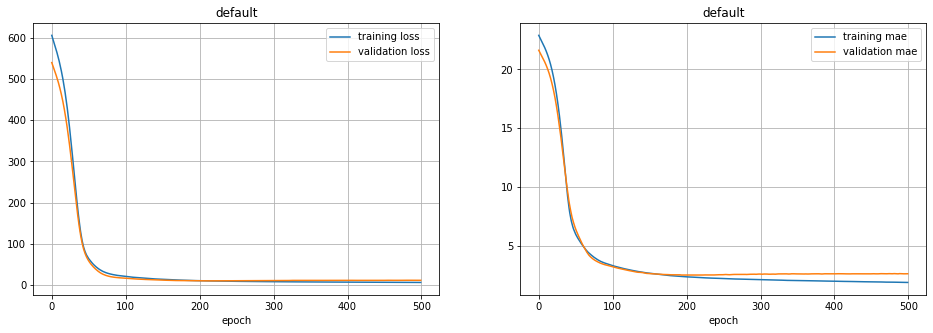

In [87]:
model, history = train_model()
plot_history(history, 'default')

In [88]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 755us/step - loss: 22.0759 - accuracy: 0.0000e+00 - mae: 3.0775


[22.075929641723633, 0.0, 3.077514410018921]